In [1]:
import pandas as pd
import numpy as np

In [3]:
e_s=pd.Series()
e_s

Series([], dtype: object)

In [6]:
s1=pd.Series(np.random.randint(1,25,10))
s2=pd.Series(np.random.randint(1,25,10))
print(s1)
print(s2)

0     4
1     5
2     1
3    12
4    22
5     4
6     8
7    17
8     1
9     7
dtype: int32
0    10
1    18
2    11
3     7
4    20
5     1
6    22
7    17
8    11
9     2
dtype: int32


In [9]:
add=s1+s2
sub=s1-s2
print(add)
print(sub)

0    14
1    23
2    12
3    19
4    42
5     5
6    30
7    34
8    12
9     9
dtype: int32
0    -6
1   -13
2   -10
3     5
4     2
5     3
6   -14
7     0
8   -10
9     5
dtype: int32


In [11]:
s1[s1==s2]

7    17
dtype: int32

In [18]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
def change_dtype(series):
    return pd.to_numeric(series,errors="coerce")
print(change_dtype(series))

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


In [68]:
df=pd.read_csv("batsman_runs_series.csv",index_col=0,names=["runs"]).iloc[:,0]
df.head()


batter            batsman_run
A Ashish Reddy            280
A Badoni                  161
A Chandila                  4
A Chopra                   53
Name: runs, dtype: object

In [65]:
df.sort_values(ascending=False).head(20)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
G Gambhir         4217
AT Rayudu         4190
AM Rahane         4074
KL Rahul          3895
SR Watson         3880
MK Pandey         3657
SV Samson         3526
KA Pollard        3437
F du Plessis      3403
YK Pathan         3222
Name: batsman_run, dtype: int64

In [17]:
(df.value_counts()>2000).size

317

In [19]:
(df > df.mean()).size

605

In [87]:
df1 = pd.read_csv("items.csv", index_col="item_name")["item_price"]
(df1.head)

<bound method NDFrame.head of item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object>

i. Read `items.csv` making `item_name` as index.
ii. Show no of nan values
ii. Item price is given in $, so convert it to rupees without currency symbol.
iii. Make data type of newly made series as float.
iv. Fill nan with mean of the series

In [70]:
df1.isna().sum()

item_name      0
item_price    50
dtype: int64

In [88]:
df1=df1.str.replace("$", "", regex=False).astype(float) * 89


In [89]:
df1

item_name
Chips and Fresh Tomato Salsa              212.71
Izze                                      301.71
Nantucket Nectar                          301.71
Chips and Tomatillo-Green Chili Salsa     212.71
Chicken Bowl                             1511.22
                                          ...   
Steak Burrito                            1045.75
Steak Burrito                            1045.75
Chicken Salad Bowl                       1001.25
Chicken Salad Bowl                        778.75
Chicken Salad Bowl                        778.75
Name: item_price, Length: 4622, dtype: float64

In [91]:
df1.fillna(df1.mean)

item_name
Chips and Fresh Tomato Salsa              212.71
Izze                                      301.71
Nantucket Nectar                          301.71
Chips and Tomatillo-Green Chili Salsa     212.71
Chicken Bowl                             1511.22
                                          ...   
Steak Burrito                            1045.75
Steak Burrito                            1045.75
Chicken Salad Bowl                       1001.25
Chicken Salad Bowl                        778.75
Chicken Salad Bowl                        778.75
Name: item_price, Length: 4622, dtype: object

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [93]:
df1.mean()

664.2098031496064

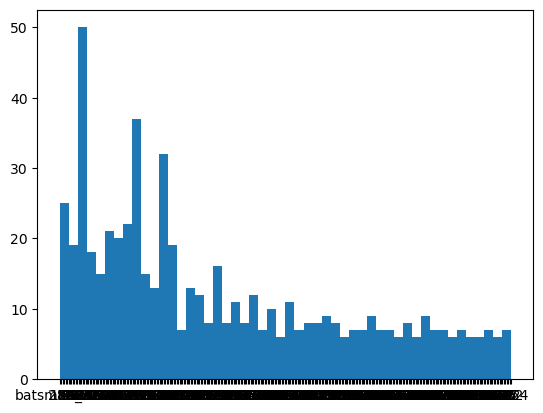

In [105]:
import matplotlib.pyplot as plt
plt.hist(df,bins=50)
plt.show()

In [108]:
((df1 > 1000) & (df1<2000)).sum()

972

In [112]:
df1.quantile([.30,0.06])

0.30    396.05
0.06    111.25
Name: item_price, dtype: float64